In this notebook, we implement the interior-point method for 3 examples
Run the code, you can see the animation display online in this notebook. I also saved the animations as a gifs for easy viewing.

In [4]:
from numpy import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sympy.solvers import solve
from sympy import Symbol
import matplotlib.animation
from sympy.solvers import solve
from sympy import Symbol
from IPython.display import HTML


Example 1 LP
\begin{eqnarray} 
\mbox{minimize}&~& -400x_1 - 300x_2
\end{eqnarray}
\begin{eqnarray}
\mbox{subject to}
&~& 60x_1 + 40x_2 + x_3 = 3800 \\
&~& 20x_1 + 30x_2 + x_4 = 2100 \\
&~& 20x_1 + 10x_2 + x_5 = 1200 \\
&~& x_i \geq 0, \:\:\: i=1,2,3,4,5
\end{eqnarray}

In [5]:
def affine_scaling(c, A, b, x0, alpha=0.5, eps=10e-4):
    ''' Interior Point Method to Solve Linear Programming Problems in Standard Form
        minimize (c^T)*x
        subject to A*x = b
                   x_i >= 0  (i=1,...,n)            

    Parameters
    ----------
    c : matrix, shape (n, 1); 
    A : matrix, shape　(m, n); 
    b : matrix, shape (m, 1);  
    x0 : matrix, shape (n, 1); Initial value 
    alpha : float in (0, 1); Step size (direction vector weight), default: 0.5
    eps : float > 0; Convergence threshold, default value: 10e-4
    
    Returns
    -------
    xk : matrix, shape (n, 1); optimal solution
    '''
    xk = x0
    
    delta_x = [inf]
    
    record_x1 = []
    record_x2 = []
    while np.linalg.norm(delta_x) > eps:
        Xk = diagflat(xk.T)
    
        yk = np.linalg.solve(A*Xk*Xk*A.T, A*Xk*Xk*c)
        
        zk = c - A.T*yk
        
        if all(zk==0):
            break
        delta_x = -(Xk*Xk*zk)/np.linalg.norm(Xk*zk)
        xk = xk + alpha*delta_x
        record_x1.append(xk[0].item(0))
        record_x2.append(xk[1].item(0))

    return xk,record_x1,record_x2


def get_value(x1,x2):

    x0 = matrix([[x1], 
                 [x2],                
                 [b[0,0] - A[0,0]*x1 - A[0,1]*x2],
                 [b[1,0] - A[1,0]*x1 - A[1,1]*x2],
                 [b[2,0] - A[2,0]*x1 - A[2,1]*x2]])
     
    x_opt,x1r,x2r = affine_scaling(c, A, b, x0)
    
    for i,xi in enumerate(x_opt):
        print(i+1, np.round(xi))
    print('Obj :', np.round(c.T * x_opt))
    
    return x1r,x2r


In [6]:
#test LP problem
c = matrix([[-400],
                [-300],
                [0],
                [0],
                [0]])
A = matrix([[60, 40, 1, 0, 0],
                [20, 30, 0, 1, 0],
                [20, 10, 0, 0, 1]])
b = matrix([[3800], 
                [2100],
                [1200]])

1 [[30.]]
2 [[50.]]
3 [[0.]]
4 [[0.]]
5 [[100.]]
Obj : [[-27000.]]
1 [[30.]]
2 [[50.]]
3 [[0.]]
4 [[0.]]
5 [[100.]]
Obj : [[-27000.]]
1 [[30.]]
2 [[50.]]
3 [[0.]]
4 [[0.]]
5 [[100.]]
Obj : [[-27000.]]


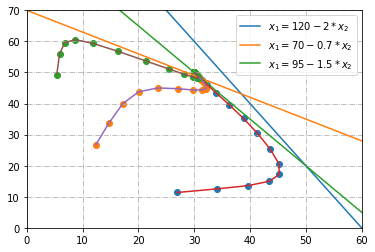

In [9]:
#set 3 different initial points and plot 3 trajectory
x1r_0,x2r_0 = get_value(20,10)
x1r_1,x2r_1 = get_value(10,20)
x1r_2,x2r_2 = get_value(5,40)

x1r = [x1r_0,x1r_1,x1r_2]

x2r = [x2r_0,x2r_1,x2r_2]

fig = plt.figure()

ax = plt.axes(xlim=(0, 60), ylim=(0, 70))

x = np.linspace(0.0,60.0,100)
y1 = 120-2*x
y2 = 70-0.7*x
y3 = 95-1.5*x
 
plt.plot(x,y1,label=r'$x_1=120-2*x_2$')
plt.plot(x,y2,label=r'$x_1=70-0.7*x_2$')
plt.plot(x,y3,label=r'$x_1=95-1.5*x_2$')

plt.legend()

plt.grid(True, linestyle='-.')

N = 3
for i in range(N):
    plt.scatter(x1r[i],x2r[i])


lines = [plt.plot([], [])[0] for _ in range(3)] #lines to animate

def init():
    #init lines
    for line in lines:
        line.set_data([], [])


    return lines  

def animate1(i):
    #animate lines
    for j,line in enumerate(lines):
        line.set_data(x1r[j][:i], x2r[j][:i])


    return lines  

anim1 = matplotlib.animation.FuncAnimation(fig, animate1, init_func=init,
                               frames=20, interval=100, blit=True)


anim1.save('./gifs/lp_interior1.gif', dpi=80, writer='imagemagick')
HTML(anim1.to_jshtml())

Example 2 LP
\begin{eqnarray} 
\mbox{minimize}&~& -x_1 - x_2
\end{eqnarray}
\begin{eqnarray}
\mbox{subject to}
&~& x_1 + x_2  = 0.5 \\
&~& x_1 - x_2= 1
\end{eqnarray}

In [10]:
import numpy as np

def karmarkar_method(x, c, amat, b,
                     gamma=1.0, eps=1.0e-3, nloop=30):
    """
    Solve the linear programming problem with Karmarkar method.
    object  min z = c^T * x
    subject Ax <= b
    """
    for n in range(nloop):
        vk = b - amat * x
        gmat = amat.T * np.diag(1.0 / np.square(vk.A1)) * amat
        d = np.linalg.pinv(gmat) * c
        if np.linalg.norm(d) < eps:
            break
        hv = -amat * d
        if np.max(hv) <= 0:
            print("Unbounded!")
            x = None
            break
        alpha = gamma * np.min(vk[hv > 0] / hv[hv > 0])
        x -= alpha * d
        yield x
    return x

    

In [11]:
c = np.matrix([[-1.0],
                   [-1.0]])
amat = np.matrix([[1.0, 1.0],
                      [1.0, -1.0]])
b = np.matrix([[0.5],[1.0]])

res = karmarkar_method(np.matrix([[-10.0], [-10.0]]), c, amat, b, gamma=0.5, eps=1.0e-3, nloop=30)

optX = []
optY= [] 

for x in (res):
    optX.append(x[0,0])
    optY.append(x[1,0])

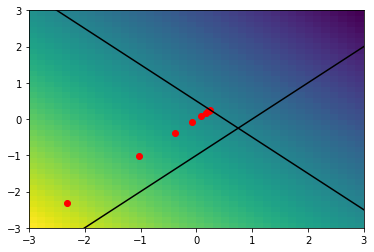

In [13]:
from pylab import *
fig, ax = plt.subplots()
axis([-3, 3, -3, 3])
l, = ax.plot([],[])
#ax = subplot(111, aspect='equal')
x = np.arange(-3.0, 3.01, 0.15)
y = np.arange(-3.0, 3.01, 0.15)
X,Y = meshgrid(x, y)
t = np.arange(-3.0, 3.01, 0.15)
func = lambda x, y : c[0, 0] * x + c[1, 0] * y
Z = func(X, Y)
pcolor(X, Y, Z)

plt.scatter(optX,optY,c='r')


const = [lambda x : -amat[0, 0] / amat[0, 1] * x + b[0, 0] / amat[0, 1],
             lambda x : -amat[1, 0] / amat[1, 1] * x + b[1, 0] / amat[1, 1]]
s = [const[i](t) for i in range(2)]

for i in range(2):
    ax.plot(t, s[i], 'k')



def animate2(i):
    l.set_data(optX[:i],optY[:i])

anim2 = matplotlib.animation.FuncAnimation(fig, animate2, frames=len(optX))


anim2.save('./gifs/lp_interior2.gif', dpi=80, writer='imagemagick')
HTML(anim2.to_jshtml())


Example 3 QP

$$ \mbox{minimize }  \frac{1}{2} \mathbf{x}^TQ\mathbf{x} + \mathbf{c}^T\mathbf{x}$$
$$ \mbox{subjet to }  A\mathbf{x}\preceq  \ b$$

$ c =\begin{bmatrix}
-2 \\ -4
\end{bmatrix}$, $Q =\begin{bmatrix}
2 & 0\\ 
0& 2
\end{bmatrix} $, $A =\begin{bmatrix}
1 & 1\\ 
1& -1\\
-3&1
\end{bmatrix} $, $b =\begin{bmatrix}
-0.5 & 1\\ 
1\\
-3
\end{bmatrix} $


In [17]:

EPS_ZERO = 1.0e-9
def predictor_corrector(x, Gmat, c, Amat, b, tau=0.5, eps=1.0e-3, nloop=30):
    ndim  = Gmat.shape[0] 
    ncnst = Amat.shape[0] 
    alldim = ndim+2*ncnst
    zeros_ndim_ncnst  = zeros((ndim, ncnst))
    zeros_ncnst       = zeros((ncnst, ncnst))
    I_ncnst           = identity(ncnst)

    f = matrix(vstack([-Gmat*x-c, -Amat*x+b, zeros((ncnst,1))]))
    ExMat = matrix(vstack([hstack([Gmat, zeros_ndim_ncnst, -Amat.T]),
                          hstack([Amat, -I_ncnst, zeros_ncnst]),
                          hstack([zeros_ndim_ncnst.T, zeros_ncnst, zeros_ncnst])]))
    delta_xyl0 = linalg.pinv(ExMat)*f
    y   = matrix([[max([1.0, abs(delta_xyl0[ndim+i,0])])] for i in range(ncnst)])
    lmd = matrix([[max([1.0, abs(delta_xyl0[ndim+ncnst+i,0])])] for i in range(ncnst)])
    rd = Gmat*x - Amat.T*lmd + c
    rp = Amat*x - y - b
    for n in range(nloop):
        err = linalg.norm(rd)**2+linalg.norm(rp)**2+(y.T*lmd)[0,0]
        if err < eps:
            break
       # affine scaling step
        lmd_y = matrix([[lmd[i,0]*y[i,0]] for i in range(ncnst)])

        f = matrix(vstack([-rd, -rp, -lmd_y]))
        ExMat = matrix(vstack([hstack([Gmat, zeros_ndim_ncnst, -Amat.T]),
                              hstack([Amat, -I_ncnst, zeros_ncnst]),
                              hstack([zeros_ndim_ncnst.T, diag([lmd[i,0] for i in range(ncnst)]), diag([y[i,0] for i in range(ncnst)]) ])]))
        delta_xyl_aff = linalg.pinv(ExMat)*f
        mu = (y.T*lmd/ncnst)[0,0]

        y_lmd_cnb = matrix(vstack([y, lmd]))
        yl_dyl    = [-y_lmd_cnb[i,0]/delta_xyl_aff[ndim+i,0] for i in range(2*ncnst) if delta_xyl_aff[ndim+i,0] <= -EPS_ZERO]
        if yl_dyl == [] or  min(yl_dyl) > 1.0:
            alpha_aff = 1.0
        else:
            alpha_aff = min(yl_dyl)
        mu_aff = ((y + alpha_aff*delta_xyl_aff[ndim:(ndim+ncnst),0]).T*(lmd + alpha_aff*delta_xyl_aff[(ndim+ncnst):alldim,0])/ncnst)[0,0]

        sig = (mu_aff/mu)**3
       # corrector step
        delta_lmd_y_aff = matrix([[delta_xyl_aff[ndim+i,0]*delta_xyl_aff[ndim+ncnst+i,0]] for i in range(ncnst)])
        sig_mu = matrix(sig*mu*ones((ncnst, 1)))
        f = matrix(vstack([-rd, -rp, -lmd_y-delta_lmd_y_aff+sig_mu]))
        delta_xyl = linalg.pinv(ExMat)*f
       # alpha_primal, alpha_dual update
        y_dy = [-tau*y[i,0]/delta_xyl[ndim+i,0] for i in range(ncnst) if delta_xyl[ndim+i,0] <= -EPS_ZERO]
        if y_dy == [] or min(y_dy) > 1.0:
            alpha_pri = 1.0
        else:
            alpha_pri = min(y_dy)
        lmd_dlmd = [-tau*lmd[i,0]/delta_xyl[ndim+ncnst+i,0] for i in range(ncnst) if delta_xyl[ndim+ncnst+i] <= -EPS_ZERO]
        if lmd_dlmd == [] or min(lmd_dlmd) > 1.0:
            alpha_dual = 1.0
        else:
            alpha_dual = min(lmd_dlmd)
        alpha_hat = min([alpha_pri, alpha_dual])
       # x, y, lmd update
        x += alpha_hat*delta_xyl[0:ndim,0]
        y += alpha_hat*delta_xyl[ndim:(ndim+ncnst),0]
        lmd += alpha_hat*delta_xyl[(ndim+ncnst):alldim,0]
        rp = (1.0 - alpha_pri)*rp
        rd = (1.0 - alpha_dual)*rd+(alpha_pri - alpha_dual)*Gmat*delta_xyl[0:ndim,0]
        yield x
   #return x, y, lmd

In [18]:
c = np.matrix([[-2.0],
                    [-4.0]])
dmat = np.matrix([[2.0, 0.0],
                      [0.0, 2.0]])
amat = np.matrix([[1.0, 1.0],
                      [1.0, -1.0],
                      [-3.0, 1.0]])
b = np.matrix([[-0.5],
                   [1.0],
                   [-3.0]])

res =predictor_corrector(matrix([[0.0],[0.0]]), dmat, c, amat, b, tau=0.5, eps=1.0e-3, nloop=30)

optX = []
optY= [] 

for x in (res):
    optX.append(x[0,0])
    optY.append(x[1,0])

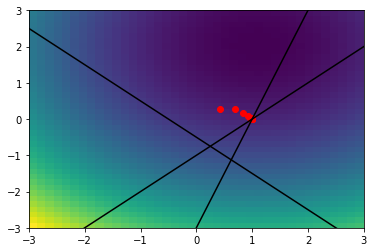

In [19]:
from pylab import *
fig, ax = plt.subplots()
axis([-3, 3, -3, 3])
l, = ax.plot([],[])
#ax = subplot(111, aspect='equal')
x = np.arange(-3.0, 3.01, 0.15)
y = np.arange(-3.0, 3.01, 0.15)
X,Y = meshgrid(x, y)
t = np.arange(-3.0, 3.01, 0.15)
func = lambda x, y : 0.5 * (dmat[0, 0] * x**2 + dmat[1, 1] * y**2) + c[0, 0] * x + c[1, 0] * y
Z = func(X, Y)
pcolor(X, Y, Z)

plt.scatter(optX,optY,c='r')


const = [lambda x : -amat[0, 0] / amat[0, 1] * x + b[0, 0] / amat[0, 1],
             lambda x : -amat[1, 0] / amat[1, 1] * x + b[1, 0] / amat[1, 1],
             lambda x : -amat[2, 0] / amat[2, 1] * x + b[2, 0] / amat[2, 1]]   
    
s = [const[i](t) for i in range(3)]

for i in range(3):
    ax.plot(t, s[i], 'k')


def animate3(i):
    l.set_data(optX[:i],optY[:i])

anim3 = matplotlib.animation.FuncAnimation(fig, animate3, frames=len(optX))


anim3.save('./gifs/qp_interior.gif', dpi=80, writer='imagemagick')
HTML(anim3.to_jshtml())